# **WELCOME TO CODE ALONG(ML)**

In [4]:
! pip install ydata-profiling

In [5]:
#IMPORT REQUIRED LIBRARIES

import pandas as pd
import numpy as np

#PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import plot_tree

#PREPROCESSING
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

#THE MODELS WE WILL BE USING
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#MODEL EVALUATION TOOLS
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# **STEP 1: IMPORT DATASETS**

There are three datasets provided: one for training, one for testing, and one for sample submissions. In this section, we will only focus on the train and test datasets.  

If you’d like to explore the submission format and compete on the Kaggle leaderboard, feel free to check out the sample submission dataset and follow the required format.

In [6]:
#LOADING THE DATASET

train_df=pd.read_csv('/content/train.csv')

In [7]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
train_df.info()  #GIVES INFORMATION REGARDING THE CONTENTS IN EACH COLUMN OF THE DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
print(train_df.isnull().sum())   #TO CHECK NUMBER OF NULL VALUES IN EACH COLUMN

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [10]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
test_df=pd.read_csv('/content/test.csv')

In [12]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


# **STEP 2: VISUALISING THE DATA**

**WHY DO WE NEED IT ? 🤔🤔**

We need to visualize data because it helps us better understand the underlying patterns, trends, and relationships within the dataset. Visualizations make complex data easier to interpret, highlight outliers or anomalies, and reveal insights that might not be immediately obvious from raw data alone.

## Initial Overview (Target Variable)

In [14]:
#TO CHECK HOW MANY PASSENGERS HAVE BEEN TRANSPORTED

train_df['Transported'].value_counts()

,count
Transported,
True,4378
False,4315


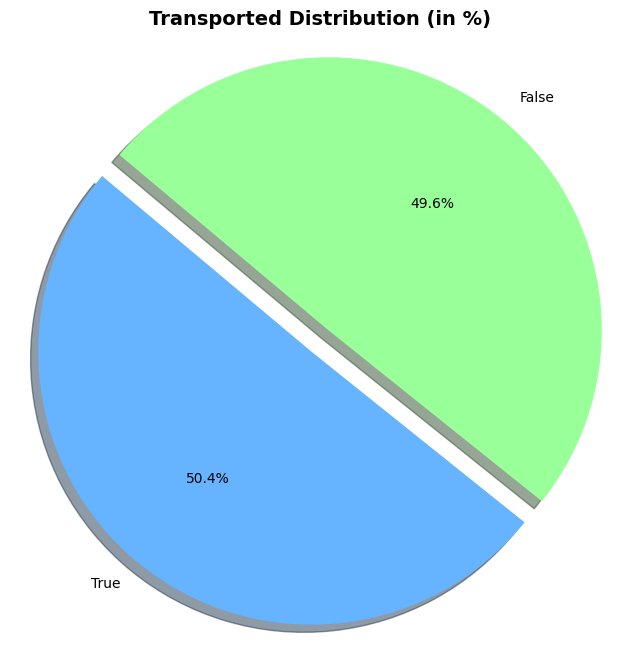

In [15]:
# THE SAME DATA VISUALISED AS A PLOT

transported_counts = train_df['Transported'].value_counts()
labels = transported_counts.index
sizes = transported_counts.values
colors = ['#66b3ff', '#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=(0.05, 0.05), shadow=True)
plt.axis('equal')
plt.title('Transported Distribution (in %)', fontsize=14, fontweight='bold')
plt.show()

**INFERENCES:**
In Spaceship Titanic, the target variable Transported is generally close to 50-50, meaning roughly half the passengers were transported to the alternate dimension and half were not.
This balance helps, since classification models perform better when the target classes are balanced.


##  Univariate Analysis (Each Column Alone)

**FOR CATEGORICAL COLUMNS**

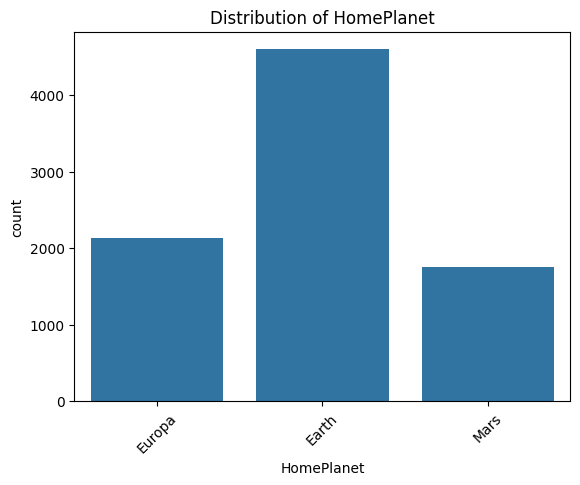

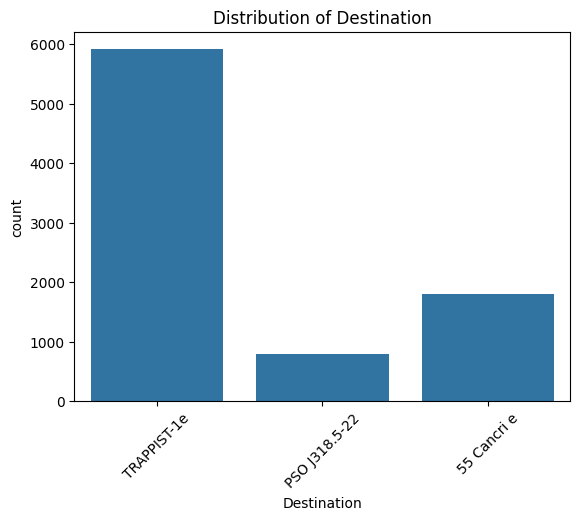

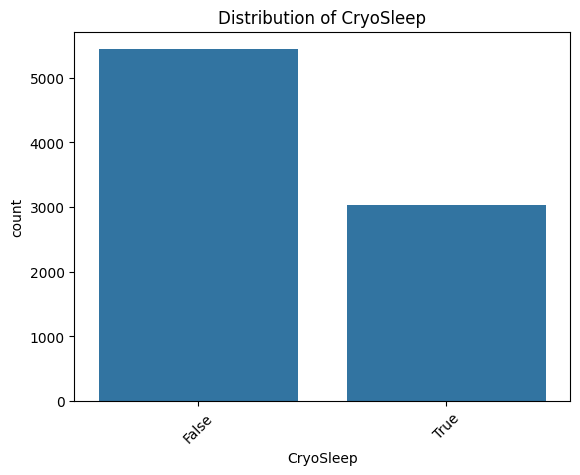

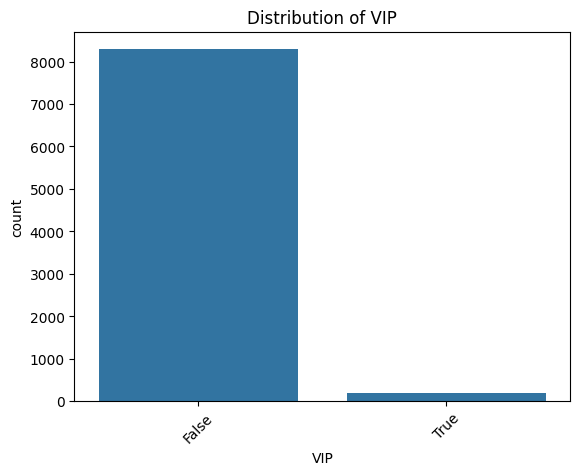

In [16]:
cat_columns = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']

for col in cat_columns:
    sns.countplot(x=col, data=train_df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

**INFERENCES:**



*   HomePlanet: Majority of passengers came from Earth, followed by Europa and Mars. This hints at Earth being the "main hub."
*   Destination: Most passengers were headed to TRAPPIST-1e, with smaller groups heading to 55 Cancri e and PSO J318.5-22.
*    CryoSleep: There is a significant portion in CryoSleep, meaning it could be a major factor related to transport likelihood.
*    VIP: Very few passengers were VIPs, suggesting luxury travel was rare.   






**FOR NUMERICAL COLUMNS**

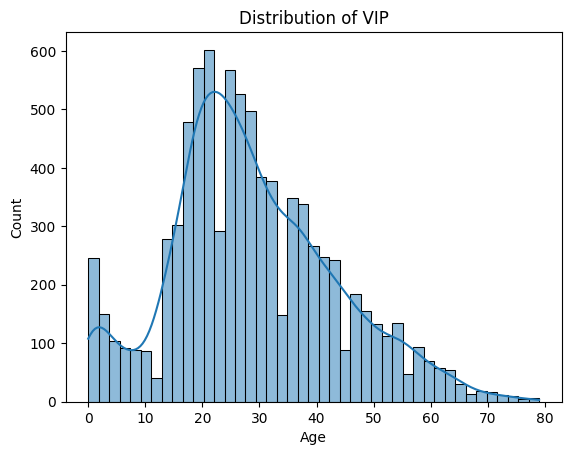

In [17]:
sns.histplot(train_df["Age"], kde=True)
plt.title(f'Distribution of {col}')
plt.show()

**INFERENCES:** Bimodal distribution, with peaks around children and mid-aged adults. Possibly families travelling together.

*NOTE:* A bimodal distribution is a statistical distribution with two distinct peaks. It indicates that there are two groups of data with different characteristics

## Bivariate Analysis (Feature vs Transported)

In [18]:
num_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

**FOR CATEGORICAL COLUMNS**

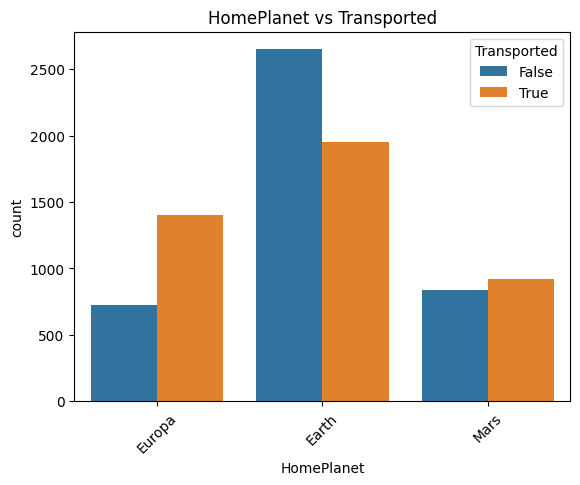

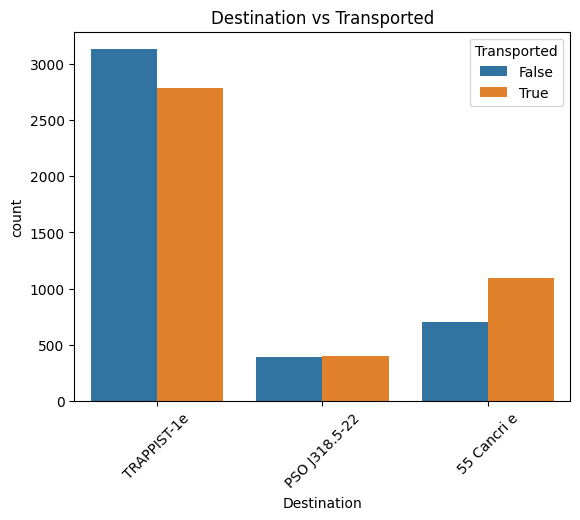

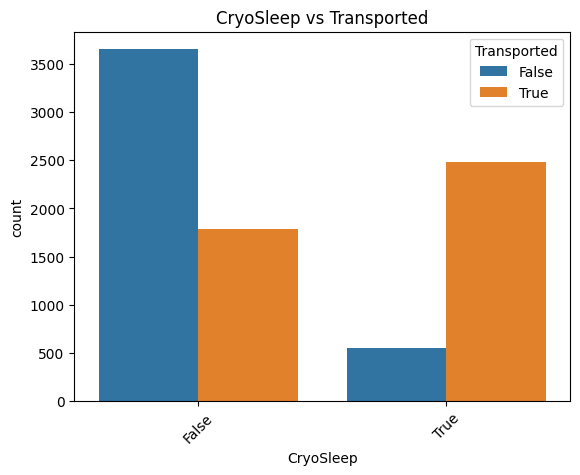

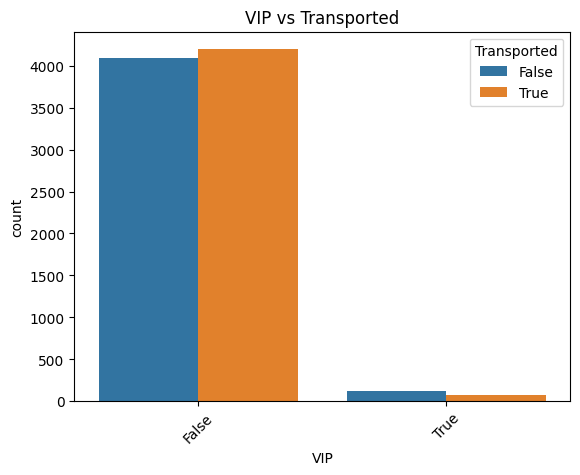

In [19]:
for col in cat_columns:
    sns.countplot(x=col, hue='Transported', data=train_df)
    plt.title(f'{col} vs Transported')
    plt.xticks(rotation=45)
    plt.show()

**INFERENCES**

*  CryoSleep: Strong correlation — passengers in CryoSleep were far more likely to be transported.
*  VIP: VIP passengers were less likely to be transported, suggesting luxury accommodation might have been shielded.
*  HomePlanet: Europa passengers were more likely to be transported than Earth or Mars passengers.
*  Destination: Transport rates varied slightly, with TRAPPIST-1e passengers being transported more often.



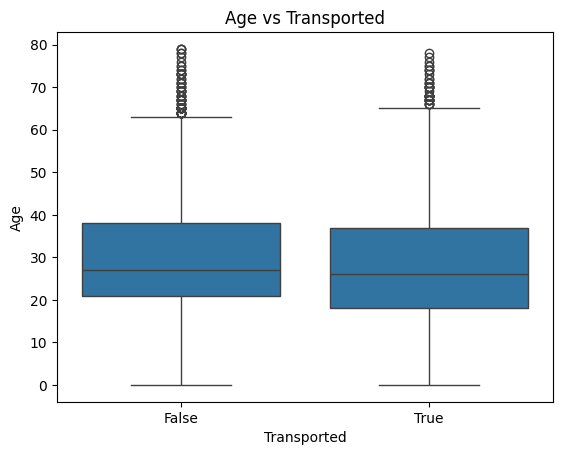

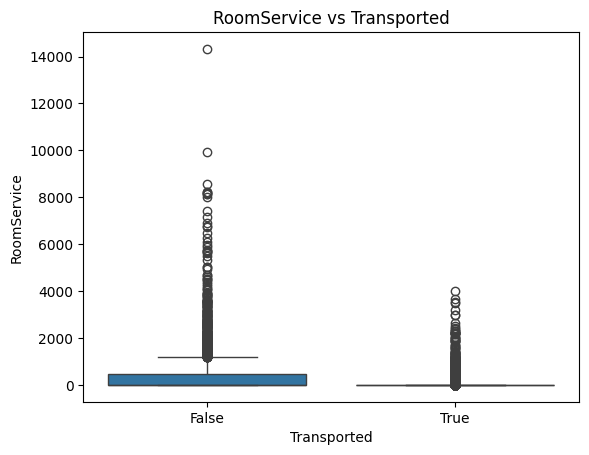

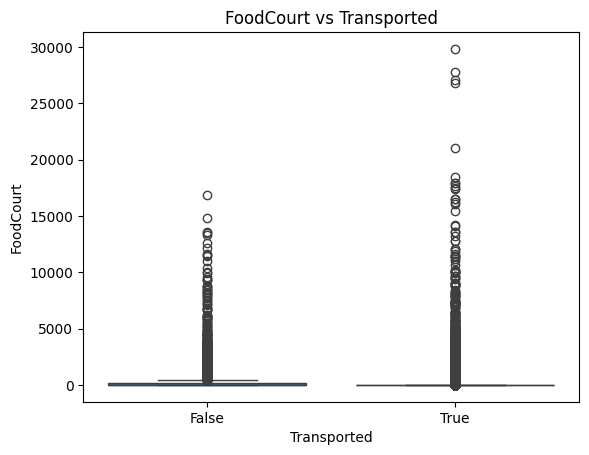

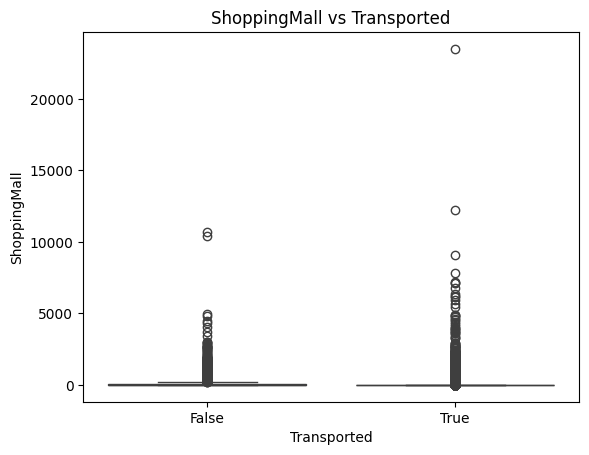

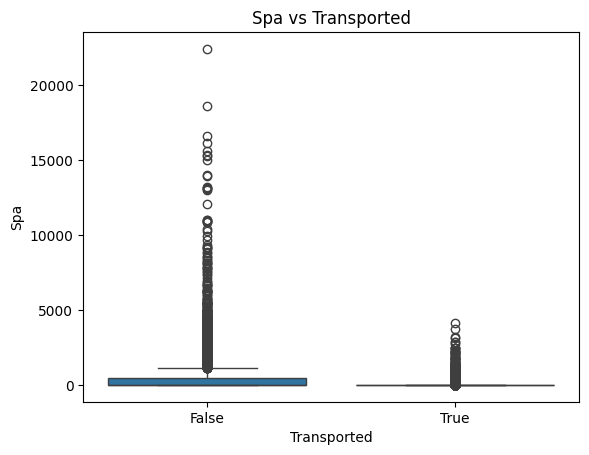

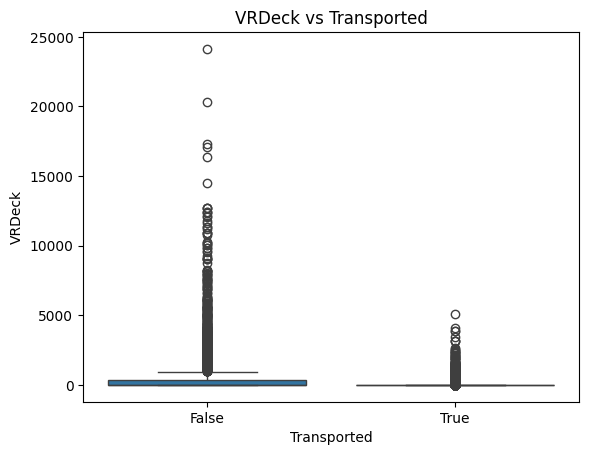

In [20]:
for col in num_columns:
    sns.boxplot(x='Transported', y=col, data=train_df)
    plt.title(f'{col} vs Transported')
    plt.show()

**INFERENCES**

*  Spending vs Transported: Those with zero or low spending were more likely transported, reinforcing the CryoSleep correlation.
*  Age: Younger passengers (especially children) had a slightly higher transport rate, possibly due to family priority or special pods.

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


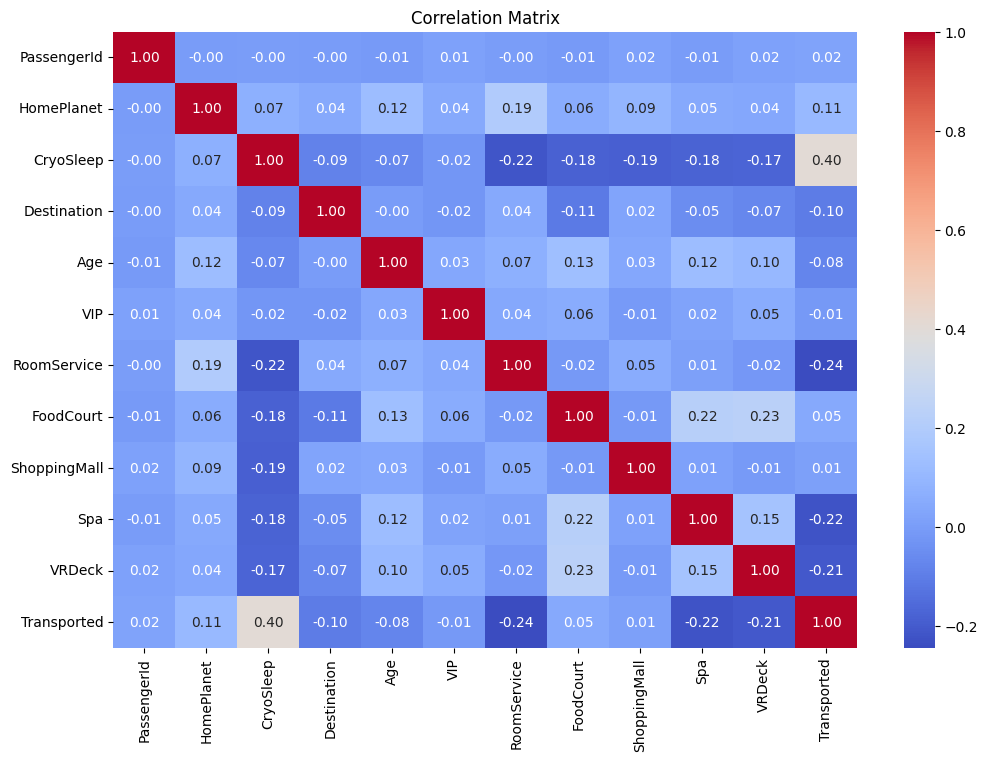

In [22]:
encoded_df = train_df.copy()
cat_columns = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']
le = LabelEncoder()
for col in cat_columns:
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
encoded_df.drop(columns=['Cabin','Name'], inplace=True)
corr_matrix = encoded_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**INFERENCES**

*  Strong positive correlation between CryoSleep and Transported.
*  Negative correlation between VIP and Transported.
*  TotalSpending had a weak negative correlation with Transported, confirming that spending less (CryoSleep) increased chances of transport.


## BONUS: PANDAS PROFILING

In [23]:
profile = ProfileReport(train_df)
profile.to_file('spaceship_titanic_eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**WHY DID WE DO THIS??**

Pandas Profiling is an incredibly useful tool for performing exploratory data analysis (EDA) with minimal effort. Instead of manually exploring each column, calculating statistics, or plotting distributions, Pandas Profiling automatically generates a comprehensive report summarizing the dataset. This saves time and ensures no important details are overlooked.

# **QUIZ ROUND: WHAT DOES THE GRAPH SAY??**

## QUESTION 1

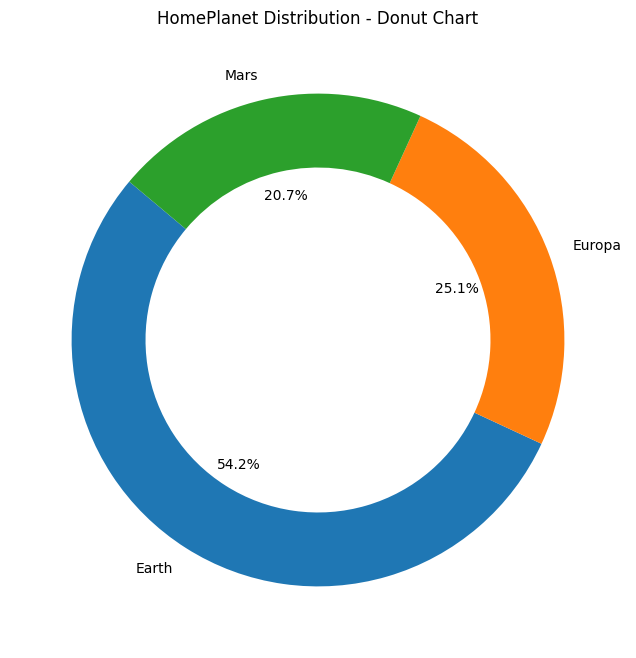

In [24]:
plt.figure(figsize=(8, 8))
homeplanet_counts = train_df['HomePlanet'].value_counts()
plt.pie(homeplanet_counts, labels=homeplanet_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('HomePlanet Distribution - Donut Chart')
plt.show()

### ANSWER....

*  Majority of passengers are from Earth, followed by Europa and Mars.
*  If you're from Earth, chances are you're not as fancy as the Europa folks (more luxury cabins).

## QUESTION 2

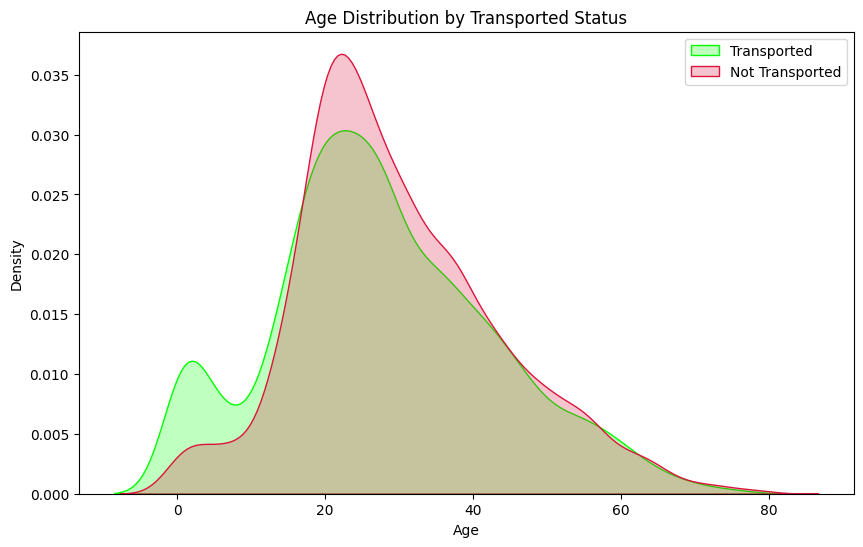

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df[train_df['Transported'] == True]['Age'], fill=True, color='lime', label='Transported')
sns.kdeplot(train_df[train_df['Transported'] == False]['Age'], fill=True, color='crimson', label='Not Transported')
plt.title('Age Distribution by Transported Status')
plt.legend()
plt.show()

### ANSWER:

*  Younger passengers (kids/teens) were more likely to be transported.
*  Could this be some kind of "save the children" protocol? 👀

## QUESTION 3

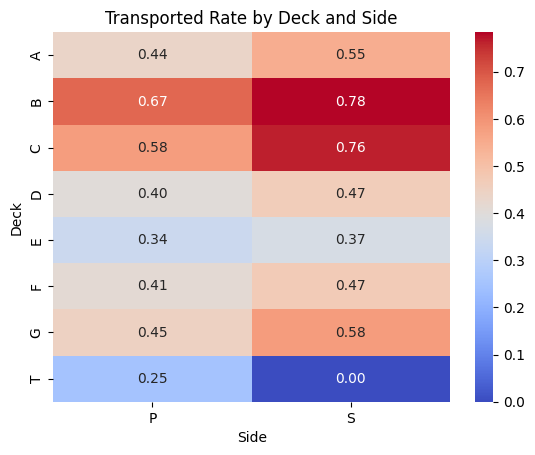

In [26]:
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
deck_side_pivot = train_df.pivot_table(index='Deck', columns='Side', values='Transported', aggfunc='mean')
sns.heatmap(deck_side_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Transported Rate by Deck and Side')
plt.show()


### ANSWER

*  Deck B and C passengers on the Port side had higher transportation rates.
*  Starboard side looks more cursed on some decks — were the aliens targeting specific sides of the ship? 😱

## QUESTION 4

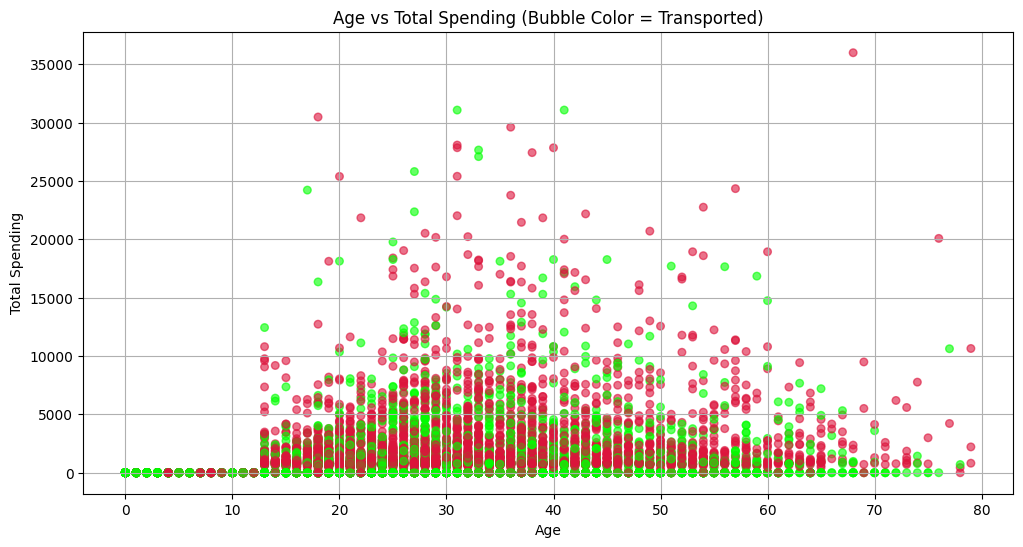

In [27]:
train_df['TotalSpending'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

plt.figure(figsize=(12, 6))
plt.scatter(train_df['Age'], train_df['TotalSpending'], c=train_df['Transported'].apply(lambda x: 'lime' if x else 'crimson'), alpha=0.6, s=30)
plt.title('Age vs Total Spending (Bubble Color = Transported)')
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()


### ANSWER...

*  Younger passengers spent far less, but were more likely to be transported.
*  Older high spenders faced the danger zone — was first class less secure?

## QUESTION 5

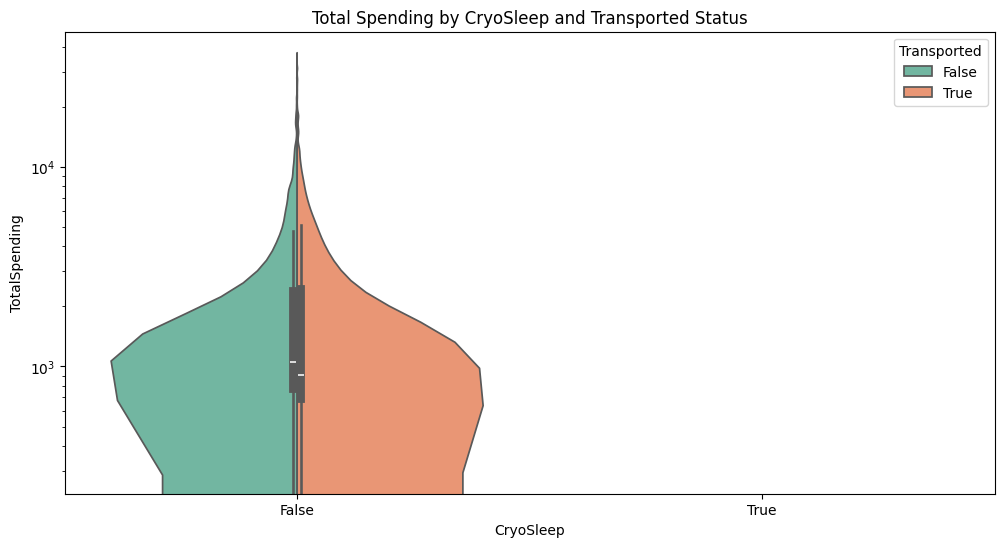

In [28]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='CryoSleep', y='TotalSpending', hue='Transported', split=True, data=train_df, palette='Set2')
plt.title('Total Spending by CryoSleep and Transported Status')
plt.yscale('log')
plt.show()


### ANSWER...

*  CryoSleep passengers had near-zero spending, duh — they’re frozen.
*  However, CryoSleep significantly increased chances of transport success — safest way to travel? 🧊🚀

## QUESTION 6

<Figure size 1000x600 with 0 Axes>

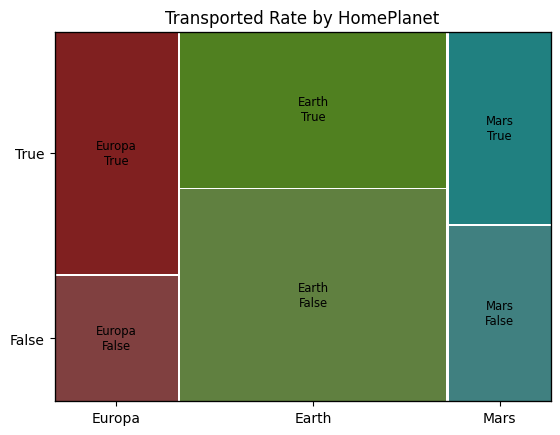

In [29]:
plt.figure(figsize=(10, 6))
mosaic(train_df, ['HomePlanet', 'Transported'], title='Transported Rate by HomePlanet')
plt.show()

### ANSWER:

*  Europa passengers had the highest transport success rate.
*  Earth passengers had a split fate, maybe too crowded?

## QUESTION 7

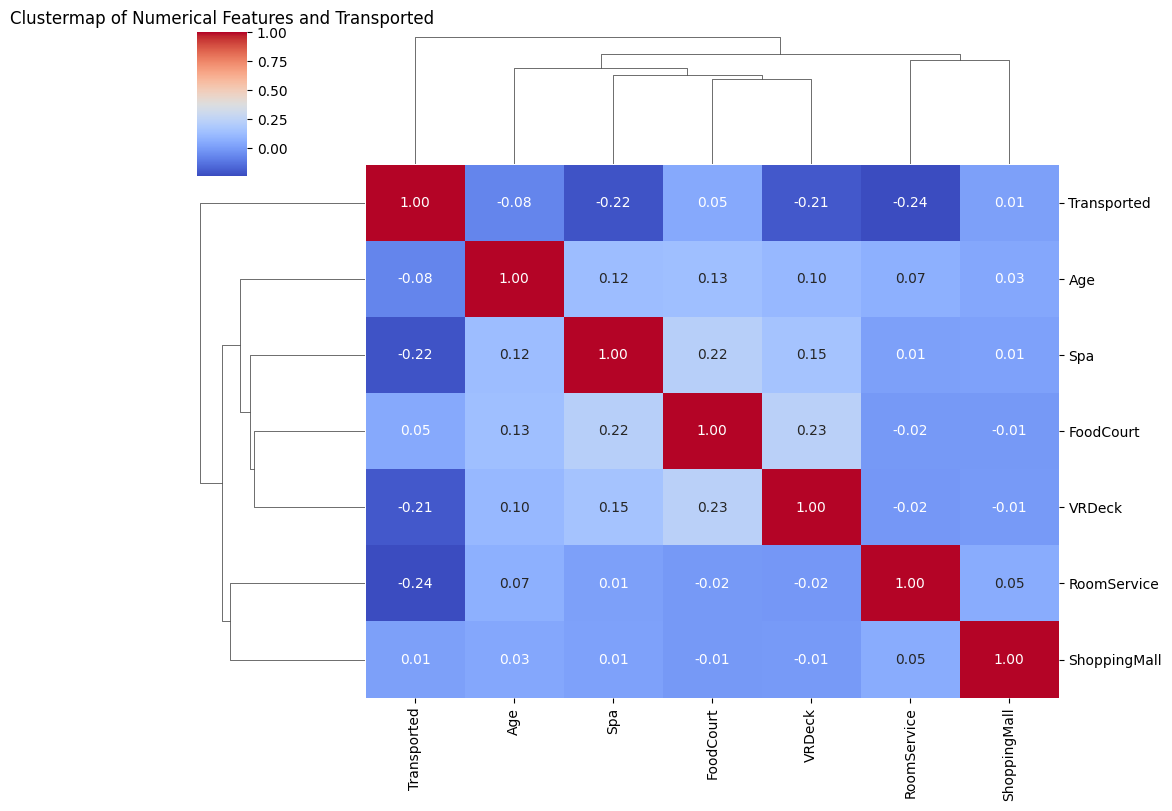

In [30]:
# num_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

corr = train_df[num_columns + ['Transported']].corr()
sns.clustermap(corr, cmap='coolwarm', annot=True, fmt='.2f', figsize=(10, 8))
plt.title('Clustermap of Numerical Features and Transported')
plt.show()

### ANSWER:

*  TotalSpending has a slightly negative correlation with Transported — luxury isn't always lucky.
*  RoomService, Spa, VRDeck spending all link together — the high rollers club.

## QUESTION 8

<ipython-input-31-a36ff783b24b>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Side', y='Transported', data=train_df, ci=None, palette='pastel')
<ipython-input-31-a36ff783b24b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Side', y='Transported', data=train_df, ci=None, palette='pastel')


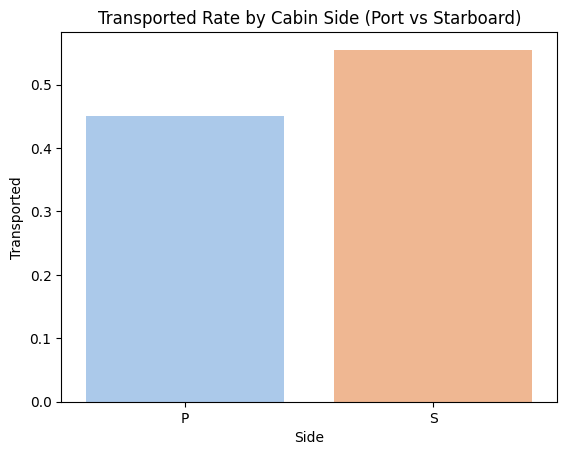

In [31]:
sns.barplot(x='Side', y='Transported', data=train_df, ci=None, palette='pastel')
plt.title('Transported Rate by Cabin Side (Port vs Starboard)')
plt.show()

### ANSWER:

*  Port side cabins were slightly safer.
*  Was there a breach or attack concentrated on the Starboard side? 🤔

## QUESTION 9

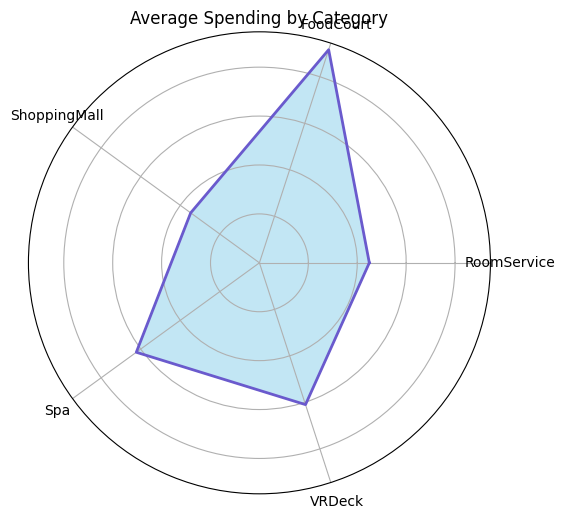

In [32]:
spending_means = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean().values
labels = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
spending_means = np.concatenate((spending_means,[spending_means[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.fill(angles, spending_means, color='skyblue', alpha=0.5)
ax.plot(angles, spending_means, color='slateblue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Average Spending by Category')
plt.show()

### ANSWER:

*  FoodCourt and VRDeck spending dominate — food and VR distractions on a doomed ship?
*  ShoppingMall saw modest spending — people were busy surviving.

# **STEP 3: DATA PREPROCESSING**

## 1) DEALING WITH NULL VALUES

**📚 Why Deal with Null Values for a Categorical Classification Dataset?**

In any **classification dataset**, including categorical classification datasets like **Spaceship Titanic**, handling null values is **critical** because:

---

#### 1️⃣ Missing Data Can Bias Results

- Machine learning models expect **complete data**.
- Missing values could bias how the model learns relationships between features and the target variable (in this case, **Transported**).

---

#### 2️⃣ Most ML Models Cannot Handle NaN Directly

- Algorithms like **Logistic Regression**, **Decision Trees**, **Random Forest**, **SVM**, **KNN**, etc., cannot directly work with missing data.
- Leaving missing values untreated will **cause errors** or force the model to **drop entire rows**, reducing training data.

---

#### 3️⃣ Missing Data Hides Real Patterns

- For example, if `HomePlanet` has missing values, it breaks important connections like:
    - `HomePlanet` → **Spending behavior**
    - `HomePlanet` → **CryoSleep status**
- This **weakens the feature’s predictive power**.

---

####4️⃣ Nulls Impact Categorical Encoding

- Before feeding categorical columns into a model, they are often **label encoded** or **one-hot encoded**.
- If null values exist, **encoders won’t work correctly** or might assign meaningless categories to `NaN`.

---

#### 5️⃣ Missing Data May Not Be Random

- In some cases, **missing values themselves are a clue**.
- Example: In **Spaceship Titanic**, if `CryoSleep` is missing, perhaps the passenger had **uncertain boarding conditions**, which could correlate with being **Transported** or not.
- You can even **add a flag column** to indicate missing values, helping the model learn.

---

#### ✅ How to Handle Nulls - Best Practices

| Data Type     | Common Strategies                                                                 |
|---------------|------------------------------------------------------------------------------------|
| **Categorical** | Fill with **mode** (most common value), "Unknown", or **separate label**            |
| **Numerical**   | Fill with **median** (robust to outliers) or **mean**                              |
| **Optional**    | Add a **"was_missing"** binary column to capture **missingness pattern**            |

---



In [33]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,TotalSpending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0


In [34]:
#fill nan values in categorical columns with the most frequent value (MODE)

cat_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

for col in cat_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

<ipython-input-34-f52206d3eba9>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[col] = train_df[col].fillna(train_df[col].mode()[0])


In [35]:
#FILL nan values in numerical columns with median values(can fill with Mean or other methods too----DIY 😉)

num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in num_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())

In [36]:
train_df.isnull().sum()

#NAME WILL BE DEALT WITH LATER

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   HomePlanet     8693 non-null   object 
 2   CryoSleep      8693 non-null   bool   
 3   Cabin          8693 non-null   object 
 4   Destination    8693 non-null   object 
 5   Age            8693 non-null   float64
 6   VIP            8693 non-null   bool   
 7   RoomService    8693 non-null   float64
 8   FoodCourt      8693 non-null   float64
 9   ShoppingMall   8693 non-null   float64
 10  Spa            8693 non-null   float64
 11  VRDeck         8693 non-null   float64
 12  Name           8493 non-null   object 
 13  Transported    8693 non-null   bool   
 14  Deck           8494 non-null   object 
 15  Num            8494 non-null   object 
 16  Side           8494 non-null   object 
 17  TotalSpending  8693 non-null   float64
dtypes: bool(

## 2)CREATING NEW FEATURES TO ASSIST IN MODEL MAKING

In [38]:
train_df['TotalSpending'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

## 3)ENCODING CATEGORICAL FEATURES

**🔡 Why Is It Important to Encode Categorical Variables in Machine Learning?**

In datasets like **Spaceship Titanic**, many features (like `HomePlanet`, `Destination`, `Deck`, `Side`, `CryoSleep`, etc.) are **categorical** — they contain text values or categories rather than numeric data. Machine learning models **cannot work directly with non-numeric data**, so encoding these categorical variables into numbers is **essential**.

---

### 🔎 Key Reasons for Encoding Categorical Variables

#### 1️⃣ Most ML Algorithms Require Numeric Input
- Algorithms like **Logistic Regression**, **Decision Trees**, **Random Forest**, **KNN**, and **SVM** only work with **numerical features**.
- Text labels must be converted into **numbers** for the models to process the data.

---

#### 2️⃣ Encoded Data Captures Patterns
- Encoding allows categorical variables to represent **different groups or categories** numerically.
- Models can detect **patterns**, such as:
    - Passengers from **Mars** may have higher transport rates.
    - Passengers in **CryoSleep** may have different spending behavior.

---

#### 3️⃣ Helps Models Compute Distances
- Algorithms like **KNN** and **SVM** rely on distance calculations.
- Without numeric encoding, there’s **no way to compute distances between categories** like `Earth`, `Europa`, and `Mars`.

---

#### 4️⃣ Preserves Information for Decision Trees & Random Forest
- Even tree-based models like **Decision Trees** and **Random Forest**, which split data into branches, still need features to be numeric.
- Encoding preserves **group distinctions**, so these models split data correctly.

---

#### ✅ Types of Encoding

| Encoding Type       | Description | Example |
|--------------------|------------------------------------------------|----------------|
| **Label Encoding**    | Converts categories into **integers** (e.g., 0, 1, 2) | Mars → 0 |
| **One-Hot Encoding**   | Creates **binary columns** for each category | Is_Mars → 1/0 |
| **Target Encoding**    | Maps categories to **mean target value** (useful for ordinal categories) | Mars → 0.65 |


In [39]:
train_df['CryoSleep'] = train_df['CryoSleep'].map({True: 1, False: 0})
train_df['VIP'] = train_df['VIP'].map({True: 1, False: 0})


In [40]:
train_df = pd.get_dummies(train_df, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True)

In [41]:
train_df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,...,False,True,True,False,False,False,False,False,False,False
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,...,False,True,False,False,False,False,True,False,False,True
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,False,True,False,False,False,False,False,False,False,True
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,False,True,False,False,False,False,False,False,False,True
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,...,False,True,False,False,False,False,True,False,False,True


## 4) DROPPING COLUMNS WHICH HAVE NO ROLE IN PREDICTION

In [42]:
train_df.drop(columns=['PassengerId', 'Name'], inplace=True)

## 5) SCALING FEATURES

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Cabin                      8693 non-null   object 
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   int64  
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Transported                8693 non-null   bool   
 10  Num                        8494 non-null   object 
 11  TotalSpending              8693 non-null   float64
 12  HomePlanet_Europa          8693 non-null   bool   
 13  HomePlanet_Mars            8693 non-null   bool 

In [44]:
scaler = StandardScaler()
train_df[num_cols + ['TotalSpending']] = scaler.fit_transform(train_df[num_cols + ['TotalSpending']])

## 6) SOME MISCELLANEOUS FIXES

In [45]:
train_df.isnull().sum()

,0
CryoSleep,0
Cabin,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
Transported,0


In [46]:
print(train_df['Num'].unique())


['0' '1' '2' ... '1892' '1893' '1894']


In [47]:
train_df['Num'] = pd.to_numeric(train_df['Num'], errors='coerce')
train_df['Num'] = train_df['Num'].fillna(train_df['Num'].mean())
train_df['Num'] = train_df['Num'].astype(int)

In [48]:
train_df.isnull().sum()

,0
CryoSleep,0
Cabin,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
Transported,0


In [49]:
train_df.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0,B/0/P,0.711945,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,False,...,False,True,True,False,False,False,False,False,False,False
1,0,F/0/S,-0.334037,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,True,...,False,True,False,False,False,False,True,False,False,True
2,0,A/0/S,2.036857,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,False,...,False,True,False,False,False,False,False,False,False,True
3,0,A/0/S,0.293552,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,False,...,False,True,False,False,False,False,False,False,False,True
4,0,F/1/S,-0.891895,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,True,...,False,True,False,False,False,False,True,False,False,True


In [50]:
train_df.drop(columns=['Cabin'], inplace=True)

# **STEP 4: MODEL MAKING**

### 1) SPLIT DATASET TO TRAIN AND TEST

In [51]:
X = train_df.drop(columns=['Transported'])
y = train_df['Transported'].astype(int)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MODEL 1: LOGISTIC REGRESSION

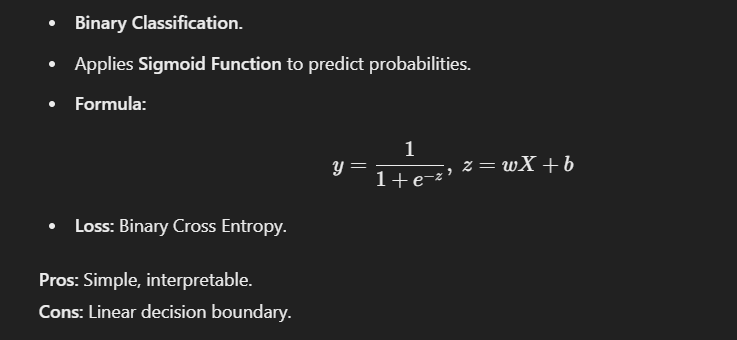

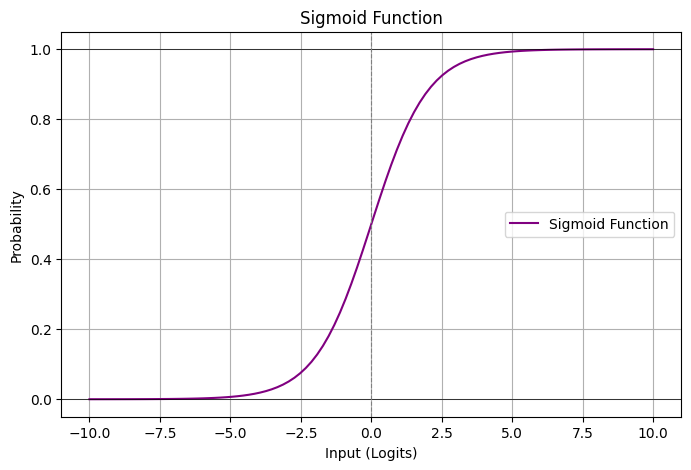

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Sigmoid Function', color='purple')
plt.axhline(0, color='black', lw=0.5)
plt.axhline(1, color='black', lw=0.5)
plt.axvline(0, color='gray', linestyle='--', lw=0.8)
plt.xlabel('Input (Logits)')
plt.ylabel('Probability')
plt.title('Sigmoid Function')
plt.legend()
plt.grid(True)
plt.show()

Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       861
           1       0.77      0.82      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

Accuracy: 0.7832087406555491


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


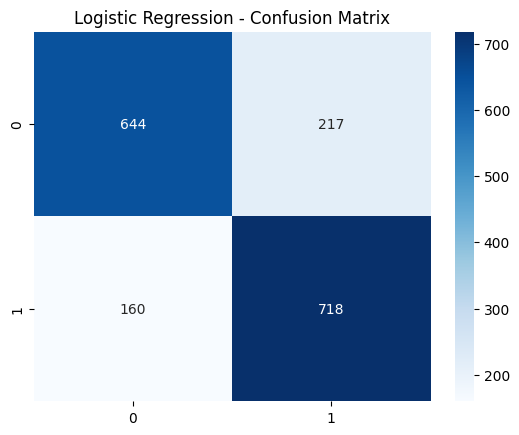

In [54]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred_lr))

print("Accuracy:", accuracy_score(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

## MODEL 2: DECISION TREE CLASSIFIER

* Recursive splitting based on feature conditions.
* Split Criteria: Gini Impurity, Entropy.
* Easy to visualize.
* **Pros**: Easy to interpret.
* **Cons**: Prone to overfitting.

NOTE:
* Gini Impurity: A metric used to measure the "impurity" or disorder of a set of data. It helps determine how mixed a node is in terms of class labels.
* Entropy: Entropy measures the amount of uncertainty (or disorder) in a node. It is used to calculate how unpredictable the data in a node is.

Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       861
           1       0.73      0.76      0.75       878

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739

Accuracy: 0.738355376653249


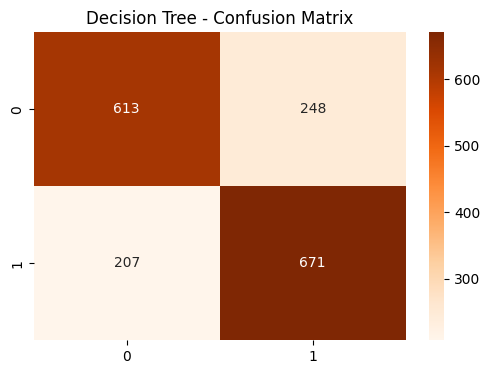

In [55]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree - Classification Report")
print(classification_report(y_test, y_pred_dt))

print("Accuracy:", accuracy_score(y_test, y_pred_dt))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title('Decision Tree - Confusion Matrix')
plt.show()


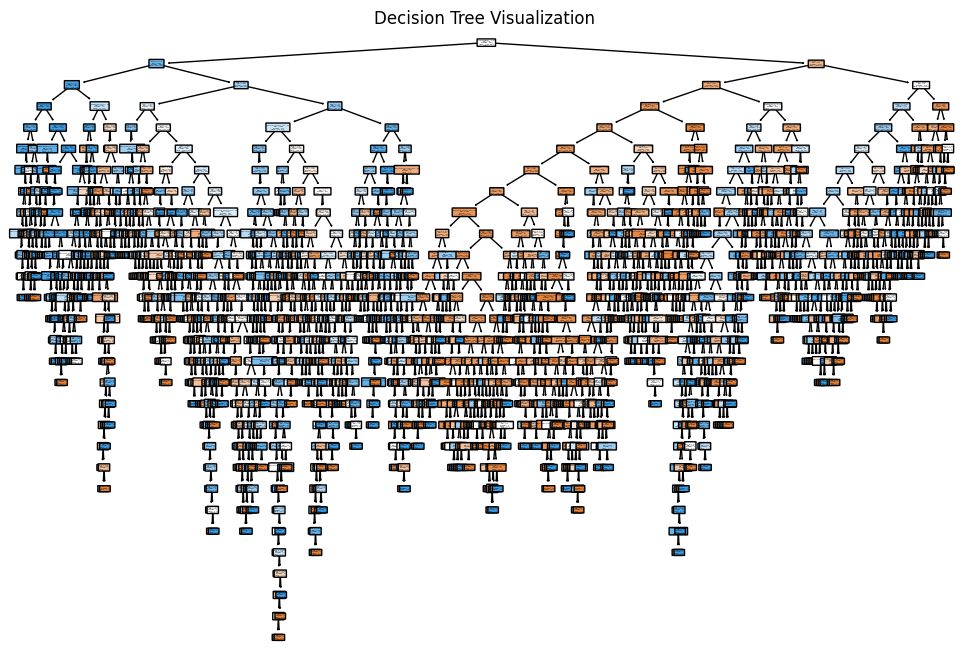

In [56]:
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=[str(c) for c in dt.classes_], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

## MODEL 3: RANDOM FOREST CLASSIFIER

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       861
           1       0.82      0.77      0.79       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739

Accuracy: 0.79700977573318


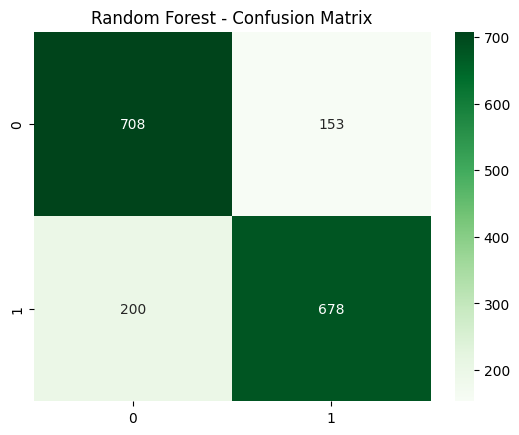

In [57]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))

print("Accuracy:", accuracy_score(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.show()



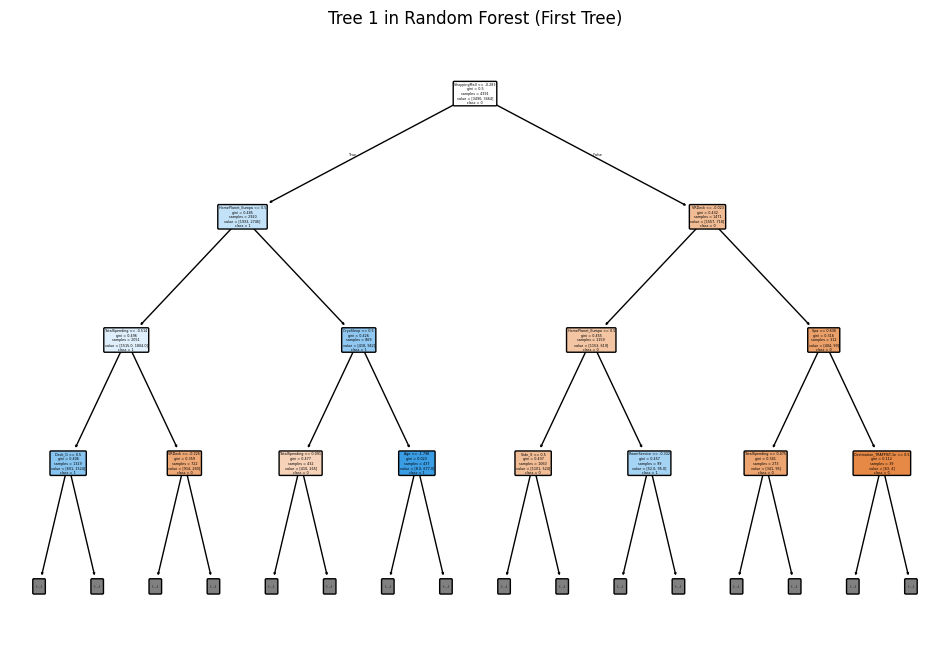

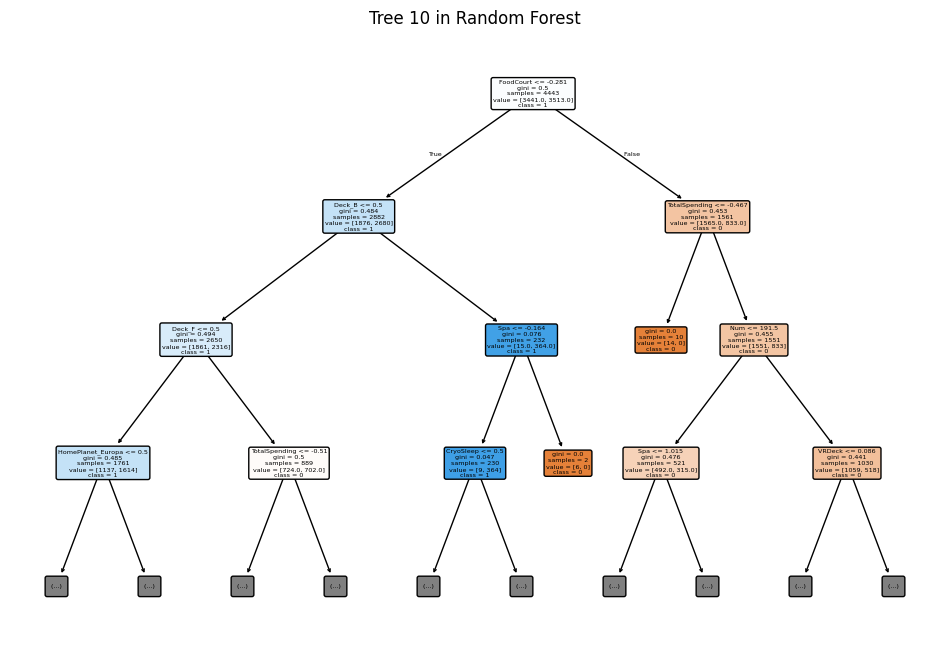

In [58]:
plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=[str(c) for c in rf.classes_], rounded=True, max_depth=3)
plt.title('Tree 1 in Random Forest (First Tree)')
plt.show()

# (Optional) Plot another tree, e.g., the 10th tree
plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[9], filled=True, feature_names=X_train.columns, class_names=[str(c) for c in rf.classes_], rounded=True, max_depth=3)
plt.title('Tree 10 in Random Forest')
plt.show()

## MODEL 4: K NEAREST NEIGHBOURS

K-Nearest Neighbors - Classification Report
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       861
           1       0.66      0.70      0.68       878

    accuracy                           0.67      1739
   macro avg       0.67      0.67      0.67      1739
weighted avg       0.67      0.67      0.67      1739

Accuracy: 0.6693502012650949


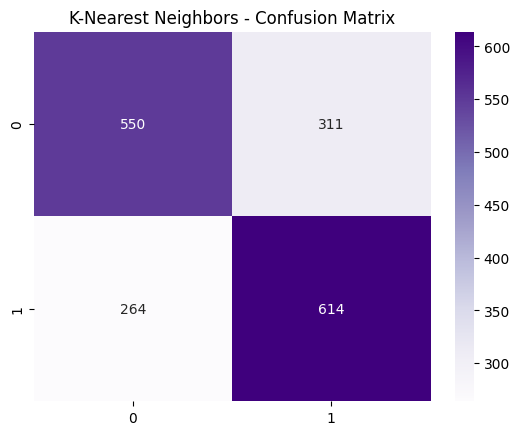

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors - Classification Report")
print(classification_report(y_test, y_pred_knn))

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Purples')
plt.title('K-Nearest Neighbors - Confusion Matrix')
plt.show()

## MODEL 5: SUPPORT VECTOR CLASSIFIER(SVC)

Support Vector Machine - Classification Report
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       861
           1       0.55      0.49      0.51       878

    accuracy                           0.54      1739
   macro avg       0.54      0.54      0.54      1739
weighted avg       0.54      0.54      0.54      1739

Accuracy: 0.5382403680276021


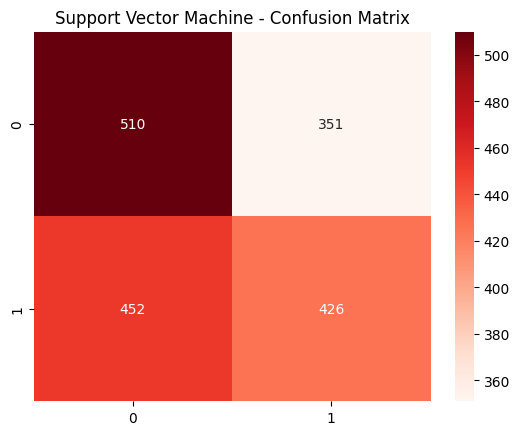

In [60]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("Support Vector Machine - Classification Report")
print(classification_report(y_test, y_pred_svm))

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Reds')
plt.title('Support Vector Machine - Confusion Matrix')
plt.show()

## COMPARING THEM ALL

📊 Final Comparison Table
                    Model  Accuracy
2           Random Forest  0.797010
0     Logistic Regression  0.783209
1           Decision Tree  0.738355
3     K-Nearest Neighbors  0.669350
4  Support Vector Machine  0.538240


<ipython-input-61-e6853a7b8b6f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=comparison, palette='viridis')


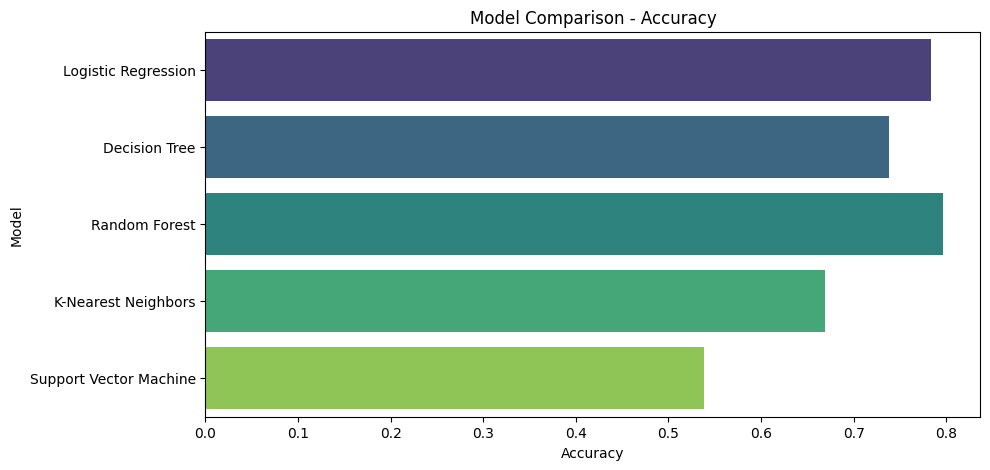

In [61]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm)
    ]
})

print("📊 Final Comparison Table")
print(comparison.sort_values(by='Accuracy', ascending=False))

plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y='Model', data=comparison, palette='viridis')
plt.title('Model Comparison - Accuracy')
plt.show()

## SAVING THE BEST MODEL

In [62]:
import pickle

with open('spaceship_model.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

print("Model saved successfully!")

Model saved successfully!


# **STEP 5: MAKING A STREAMLIT APPLICATION**

In [63]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


In [64]:
%%writefile app.py

import streamlit as st
import numpy as np
import pandas as pd
import pickle

with open('spaceship_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

homeplanet_options = ['Earth', 'Europa', 'Mars']
destination_options = ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22']
deck_options = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
side_options = ['P', 'S']

st.title('🚀 Spaceship Titanic Transport Prediction')

age = st.number_input('Age', min_value=0, max_value=100, value=30)
room_service = st.number_input('Room Service Spend', min_value=0.0, value=0.0)
food_court = st.number_input('Food Court Spend', min_value=0.0, value=0.0)
shopping_mall = st.number_input('Shopping Mall Spend', min_value=0.0, value=0.0)
spa = st.number_input('Spa Spend', min_value=0.0, value=0.0)
vr_deck = st.number_input('VR Deck Spend', min_value=0.0, value=0.0)

cryo_sleep = st.selectbox('CryoSleep', ['Yes', 'No'])
vip = st.selectbox('VIP', ['Yes', 'No'])

home_planet = st.selectbox('Home Planet', homeplanet_options)
destination = st.selectbox('Destination', destination_options)
deck = st.selectbox('Cabin Deck', deck_options)
side = st.selectbox('Cabin Side', side_options)
num = st.number_input('Number of Passengers in Cabin (Num)', min_value=0, max_value=10, value=1)

total_spending = room_service + food_court + shopping_mall + spa + vr_deck
cryo_sleep = 1 if cryo_sleep == 'Yes' else 0
vip = 1 if vip == 'Yes' else 0

feature_dict = {
    'Age': age,
    'RoomService': room_service,
    'FoodCourt': food_court,
    'ShoppingMall': shopping_mall,
    'Spa': spa,
    'VRDeck': vr_deck,
    'TotalSpending': total_spending,
    'CryoSleep': cryo_sleep,
    'VIP': vip,
    'Num': num
}

for planet in homeplanet_options:
    feature_dict[f'HomePlanet_{planet}'] = 0
feature_dict[f'HomePlanet_{home_planet}'] = 1

for dest in destination_options:
    feature_dict[f'Destination_{dest}'] = 0
feature_dict[f'Destination_{destination}'] = 1

for deck_option in deck_options:
    feature_dict[f'Deck_{deck_option}'] = 0
feature_dict[f'Deck_{deck}'] = 1

for side_option in side_options:
    feature_dict[f'Side_{side_option}'] = 0
feature_dict[f'Side_{side}'] = 1

input_df = pd.DataFrame([feature_dict])

expected_columns = [
    'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
    'Num', 'TotalSpending',
    'HomePlanet_Europa', 'HomePlanet_Mars',
    'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
    'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
    'Side_S'
]
input_df = input_df[expected_columns]


prediction = model.predict(input_df)[0]

if st.button('Predict'):
    if prediction == 1:
        st.success('✅ Passenger will be Transported!')
    else:
        st.error('❌ Passenger will NOT be Transported.')

Writing app.py


In [65]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼
added 22 packages in 4s
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼

In [68]:
!streamlit run app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.143.237.155


In [ ]:
!npx localtunnel --port 8501

⠙your url is: https://wide-buttons-walk.loca.lt


# **THANK YOU**